In [1]:
import sys
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath("../"))  # importa dalla radice del progetto
from src import core
from src import pre_processing


In [2]:
data = core.import_data("/home/zampa/projects/ProMeteo/data/test_data.csv")
data

,u,v,w,T_s
Time,,,,
2012-09-28 02:00:00.000,0.137998,0.916756,1.773081,20.984517
2012-09-28 02:00:00.050,1.562862,1.793076,0.005323,20.878866
2012-09-28 02:00:00.100,2.601104,3.122062,0.468493,18.099073
2012-09-28 02:00:00.150,0.991544,0.886645,0.524272,20.577536
2012-09-28 02:00:00.200,2.848027,2.603283,-0.780573,19.763368
...,...,...,...,...
2012-09-28 02:59:59.800,0.652165,1.642956,-0.513186,20.040135
2012-09-28 02:59:59.850,0.380596,2.937487,-1.061728,19.212168
2012-09-28 02:59:59.900,1.147719,1.649266,1.928070,20.395901


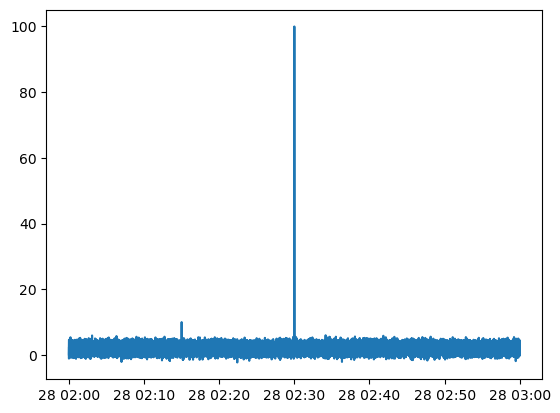

In [3]:
plt.plot(data.index, data["u"])

In [4]:
data_cleaned=pre_processing.remove_beyond_threshold(data, 30, 5, 50)

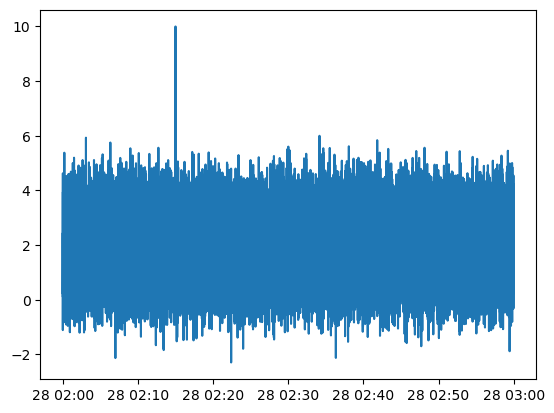

In [5]:
plt.plot(data_cleaned.index, data_cleaned["u"])

In [6]:
# valori oltre 30 effettivamente rimossi

In [7]:
n_rows=15*60*20 # segnale a 20 Hz di durata 30 min
array_example_1=np.random.normal(loc=2, scale=1, size=n_rows) # [m/s]
array_example_2=np.random.normal(loc=4, scale=1, size=n_rows) # [m/s]
array_example=np.concatenate([array_example_1, array_example_2])


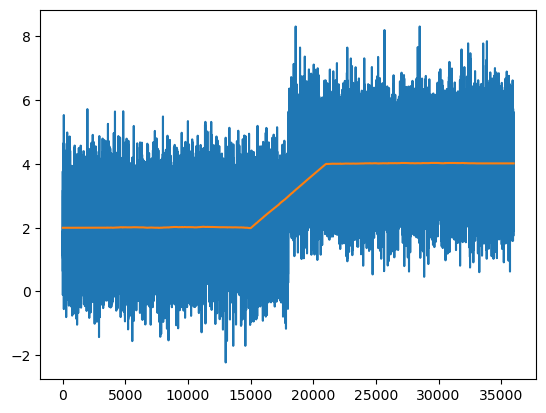

In [8]:
run_mean_ex, std_mean_ex = core.running_stats(array_example, 6001) # finestra di 5 min
index=np.arange(0,len(array_example))
plt.plot(index, array_example)
plt.plot(index, run_mean_ex)


In [9]:
u_to_despike=data_cleaned["u"].to_numpy()
run_mean, std_mean = core.running_stats(u_to_despike, 6001)
# u_despiked=pre_processing.despiking_VM97(u_to_despike, 3.5, 6001, 3, 5)

(15611.090277777777, 15611.097222222223)

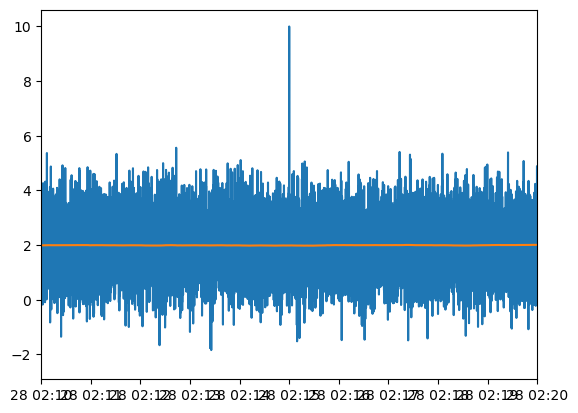

In [11]:
plt.plot(data.index, u_to_despike)
plt.plot(data.index, run_mean)
plt.xlim(pd.to_datetime("2012-09-28 02:10:00"),
         pd.to_datetime("2012-09-28 02:20:00"))

In [12]:
u_despiked = pre_processing.despiking_VM97(u_to_despike,
                                           3.5,
                                           6001,
                                           3,
                                           5)

Iteration: 0
Running stats computed
27
25
Iteration: 1
Running stats computed
0
0


In [13]:
mask=u_to_despike!=u_despiked

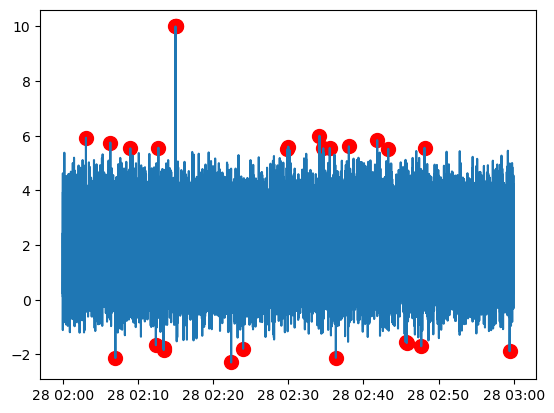

In [14]:

plt.plot(data.index, u_to_despike)
plt.scatter(data.index[mask], u_to_despike[mask], s=100, color='r')
# plt.plot(data.index, run_mean)